# Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [2]:
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Spatial Clustering
https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+(North+Jutland,+Denmark)

In [3]:
X = pd.read_csv('3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

lat        lon        alt
9759     9.752350  56.987233  34.480970
242155   9.805630  56.648194  56.090330
323160   9.503606  56.664528  26.857475
94232   10.344518  57.462248  37.277982
33792    9.981782  57.325535  36.406625

What happened to y?

## Part 1: K-means clustering

In [4]:
# K-means with N clusters
N = 7
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(X)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=1)

In [5]:
# review the cluster labels
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6}

In [6]:
X['cluster'] = km.predict(X)

In [7]:
X.cluster.values

array([2, 1, 4, ..., 6, 2, 6], dtype=int32)

In [8]:
X.cluster.value_counts()

6    2983
0    2227
4    1858
2    1378
1     889
5     476
3     189
Name: cluster, dtype: int64

<IPython.core.display.Javascript object>


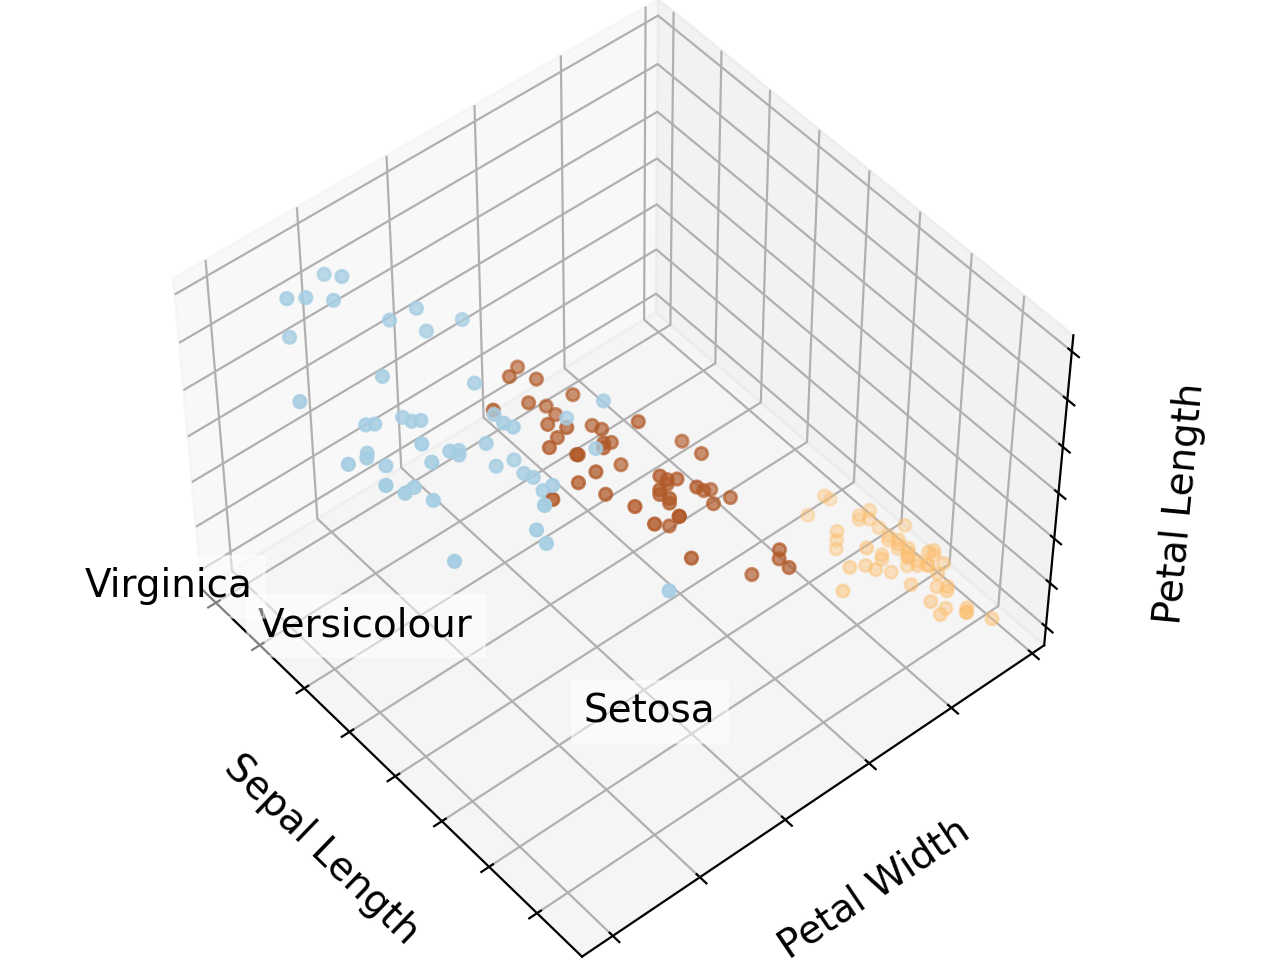

/var/folders/9c/3ylcvqn54zs1r5tlfz4_znf00000gn/T/ipykernel_3618/1535791489.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


In [9]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)
#colors = ["red", "green", "blue", "grey"]

plt.cla()

ax.scatter(X['lat'], X['lon'], X['alt'], c=X.cluster, s=5)

ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('alt')
plt.show()

<IPython.core.display.Javascript object>


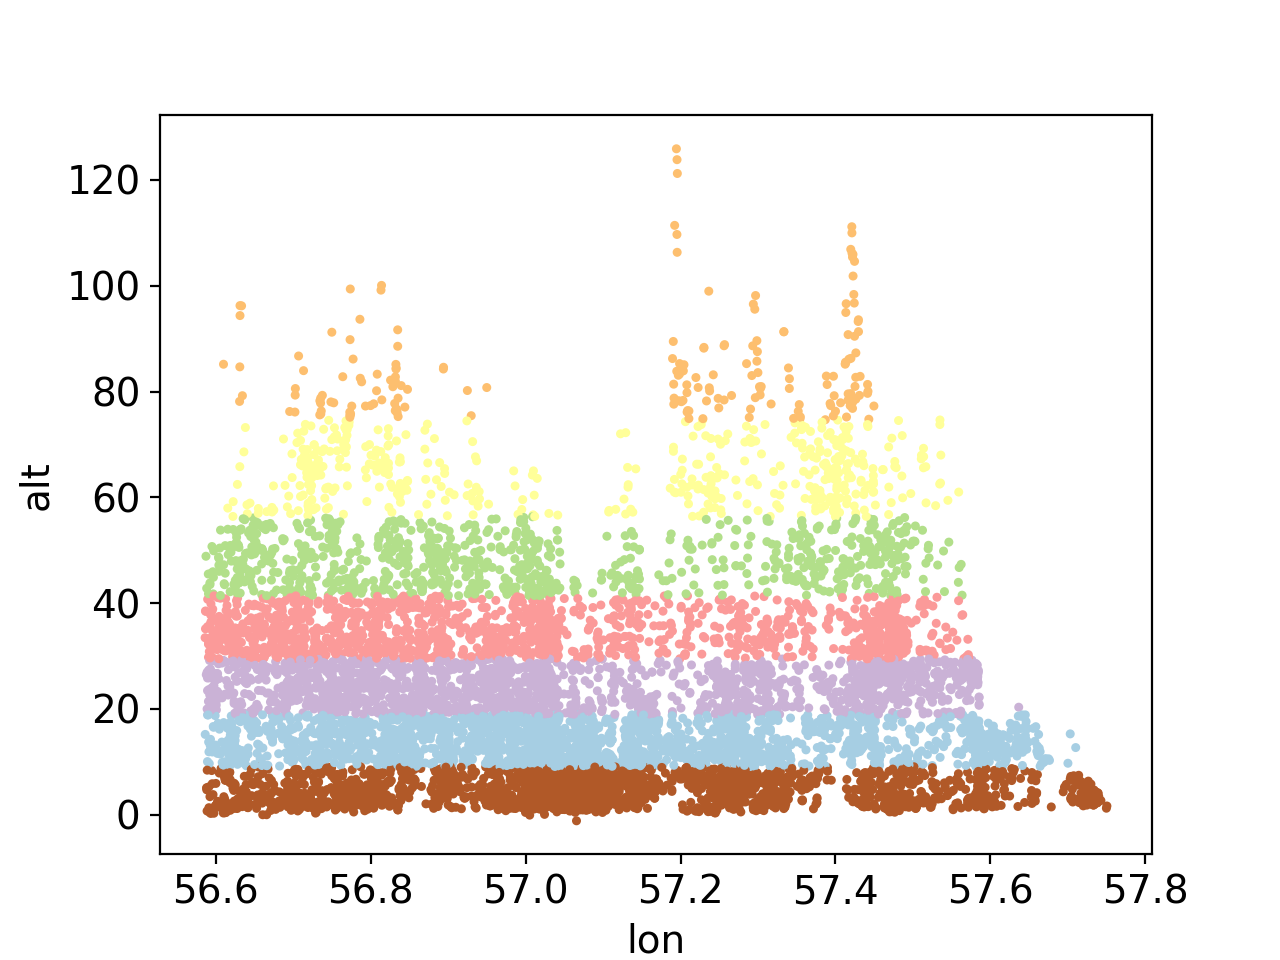

In [10]:
fig = plt.figure()
plt.scatter(X.lon, X.alt, c=X.cluster, s=5, cmap='Paired')

plt.xlabel('lon')
plt.ylabel('alt')
plt.show()

In [11]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [12]:
km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['lon', 'lat', 'alt']])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>


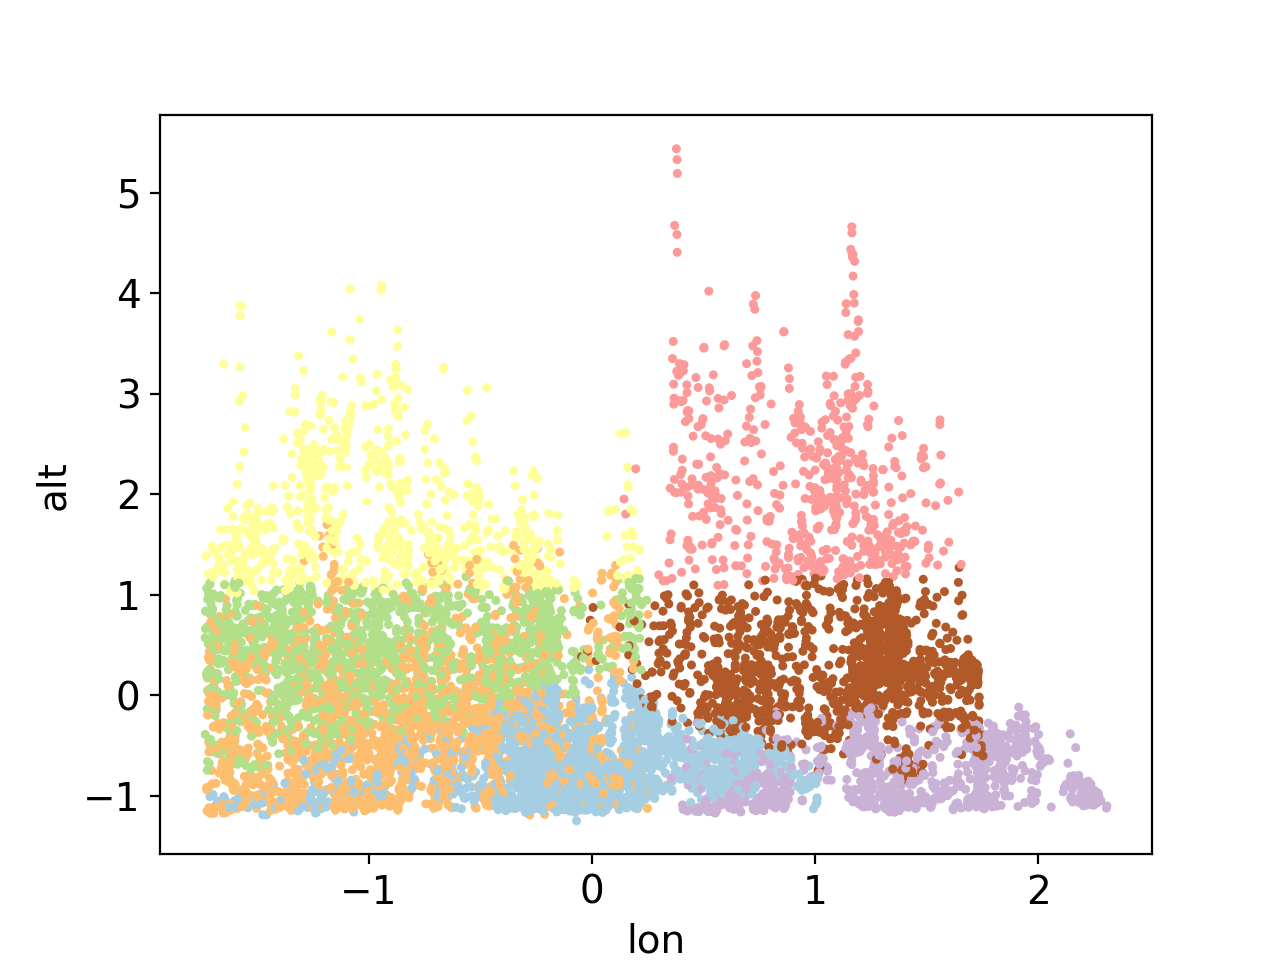

In [13]:
fig = plt.figure()
plt.scatter(XX.lon, XX.alt, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('lon')
plt.ylabel('alt')
plt.show()

<IPython.core.display.Javascript object>


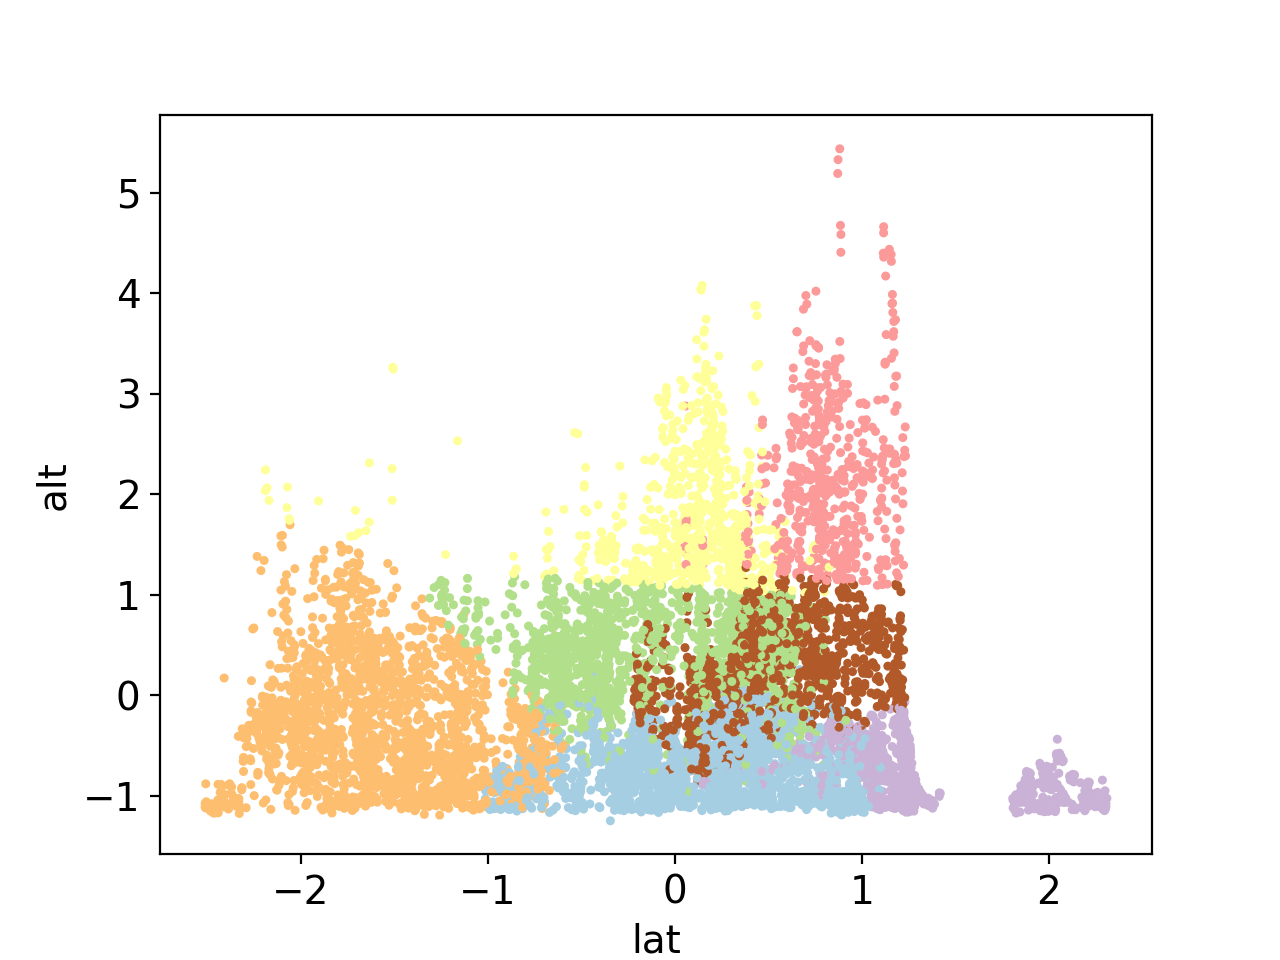

In [14]:
fig = plt.figure()
plt.scatter(XX.lat, XX.alt, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('lat')
plt.ylabel('alt')
plt.show()

<IPython.core.display.Javascript object>


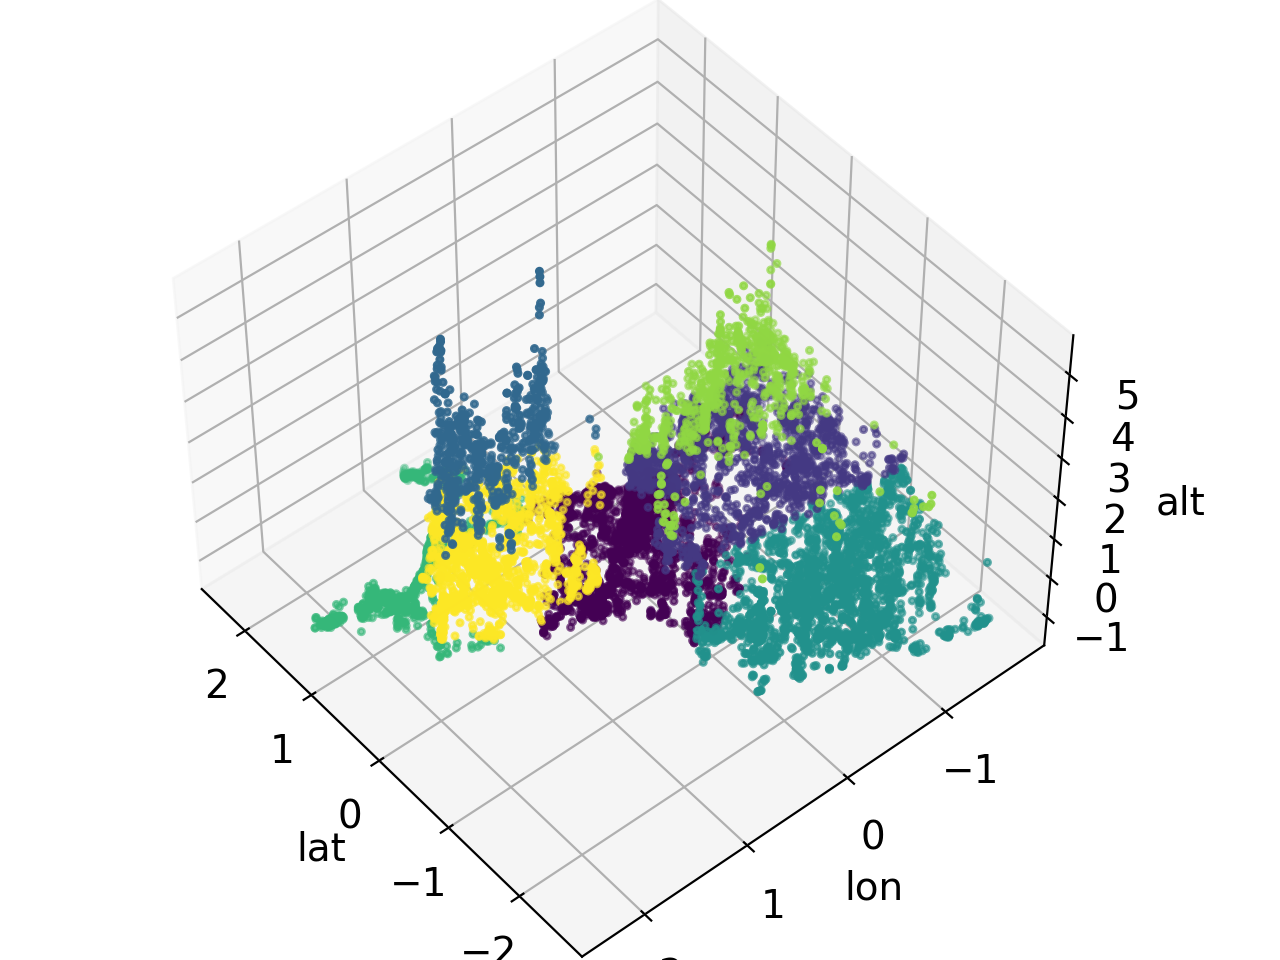

/var/folders/9c/3ylcvqn54zs1r5tlfz4_znf00000gn/T/ipykernel_3618/3361746090.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


In [15]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lat'], XX['lon'], XX['alt'], c=XX.cluster, s=5)

ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('alt')
plt.show()

In [16]:
X.std()

lat         0.631818
lon         0.288155
alt        19.006368
cluster     2.349939
dtype: float64

In [17]:
X[X.cluster==0].mean()

lat         9.655439
lon        57.117055
alt        13.708964
cluster     0.000000
dtype: float64

In [18]:
X[X.cluster==1].mean()

lat         9.806947
lon        57.010578
alt        47.926743
cluster     1.000000
dtype: float64

## 1b DBSCAN 

<IPython.core.display.Javascript object>


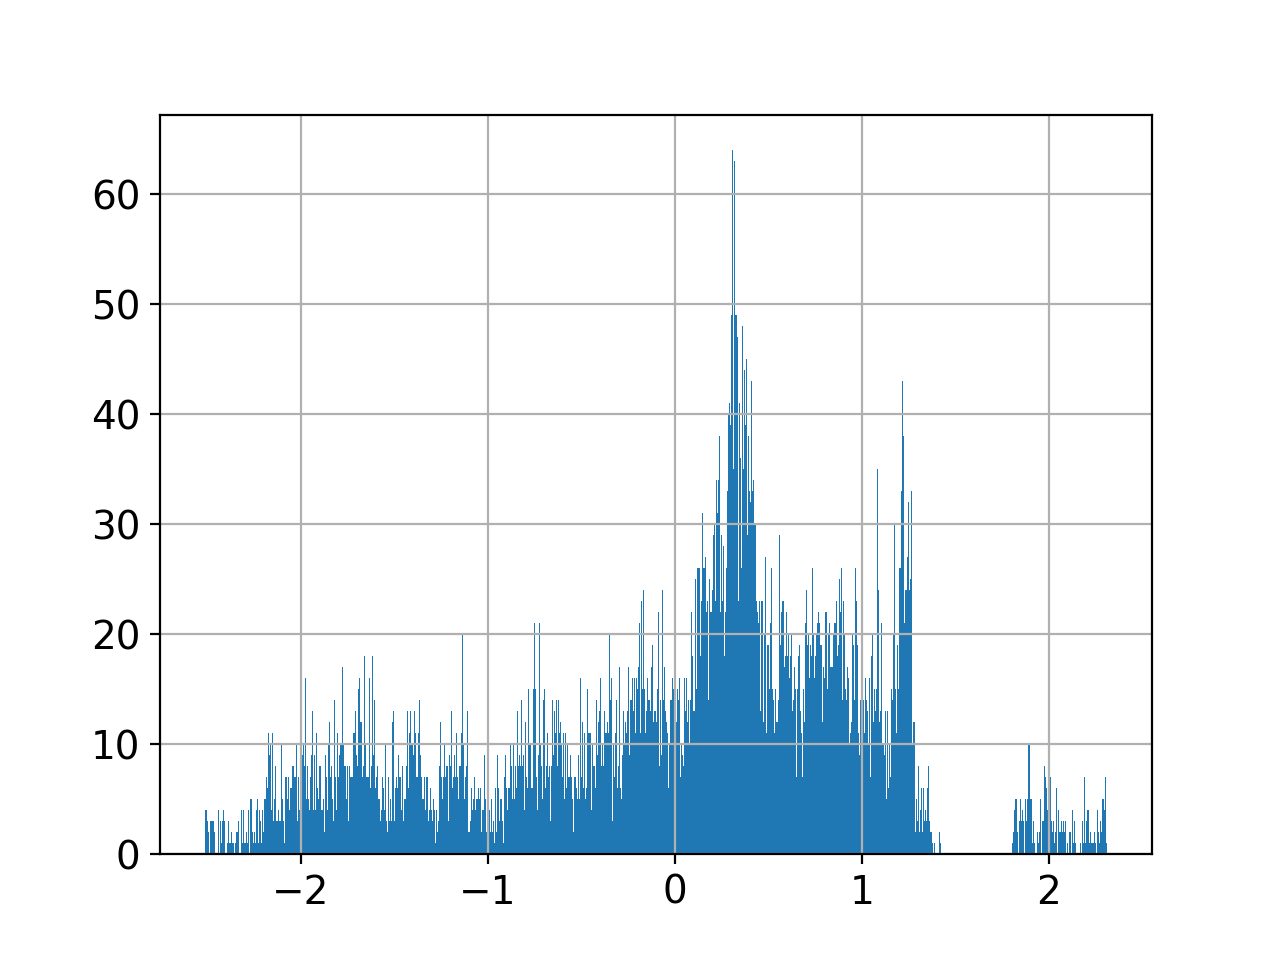

<AxesSubplot:>

In [19]:
fig = plt.figure()
XX.lat.hist(bins=1000)

<IPython.core.display.Javascript object>


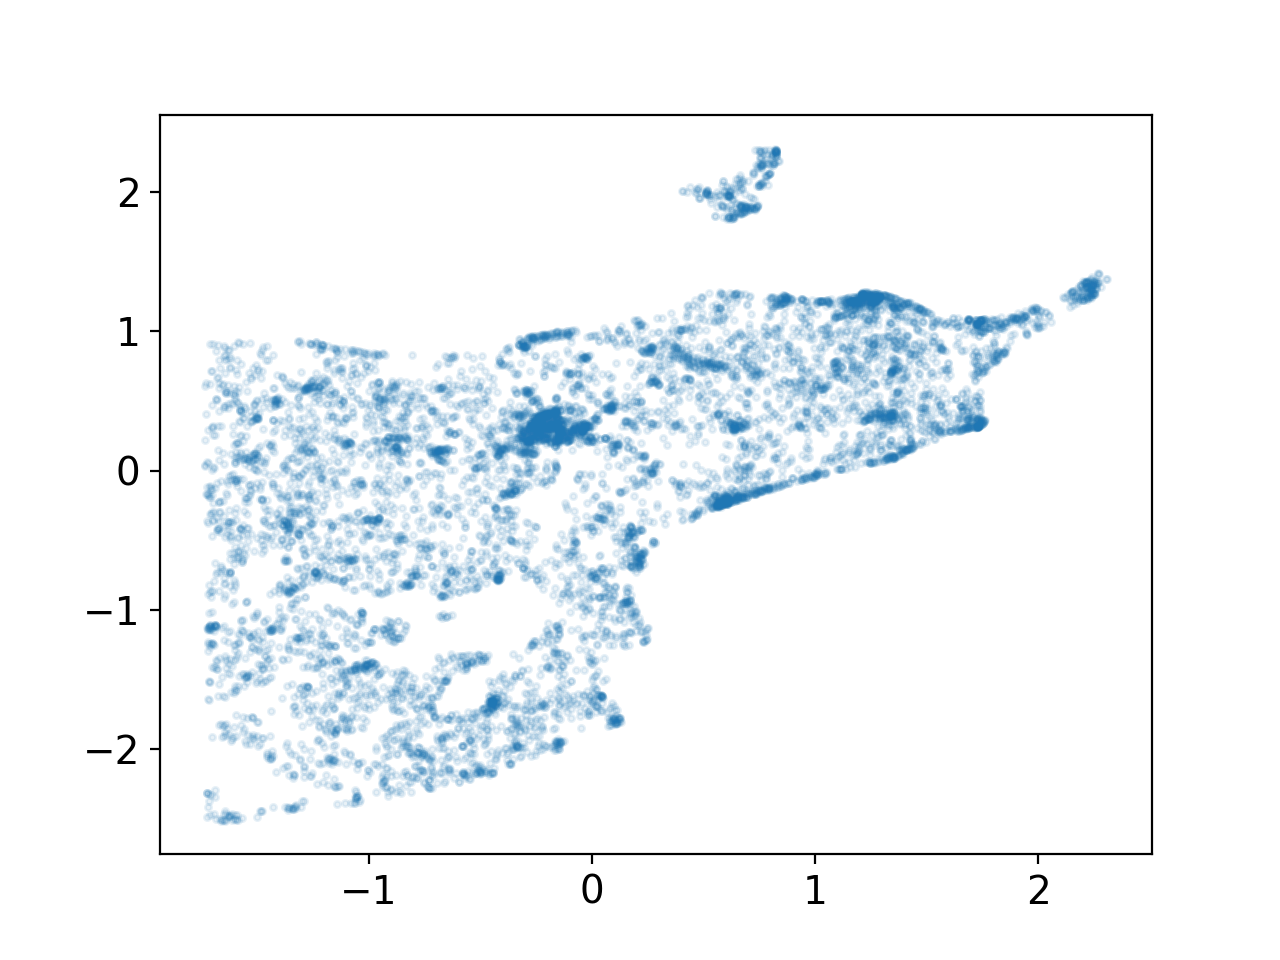

In [20]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.1, s=5, )

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.12)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
XX.cluster.value_counts()

 2      4252
-1      1347
 4       465
 10      423
 0       331
        ... 
 153       4
 152       3
 101       3
 142       3
 146       3
Name: cluster, Length: 157, dtype: int64

In [47]:
XX.head()

lat       lon       alt  cluster
9759    0.021826 -0.342152  0.626299       52
242155  0.106155 -1.518739  1.763252        0
323160 -0.371868 -1.462054  0.225197        1
94232   0.959071  1.306315  0.773461        2
33792   0.384956  0.831874  0.727615      142

In [22]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lon'], XX['lat'], XX['alt'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')
plt.show()

/var/folders/9c/3ylcvqn54zs1r5tlfz4_znf00000gn/T/ipykernel_3618/3085638687.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


<IPython.core.display.Javascript object>


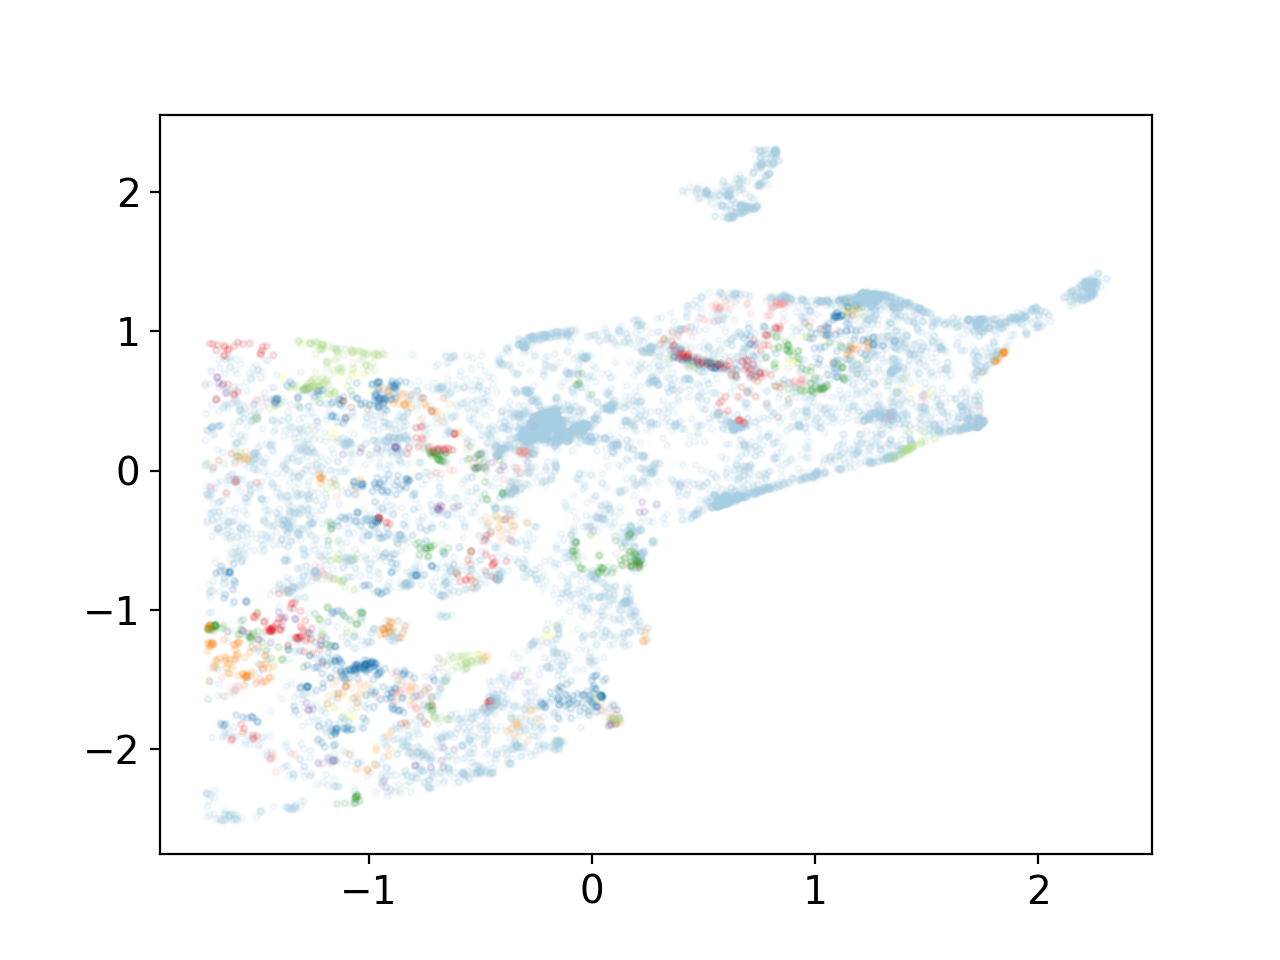

In [23]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.1, s=5, c=XX.cluster, cmap='Paired')

<IPython.core.display.Javascript object>


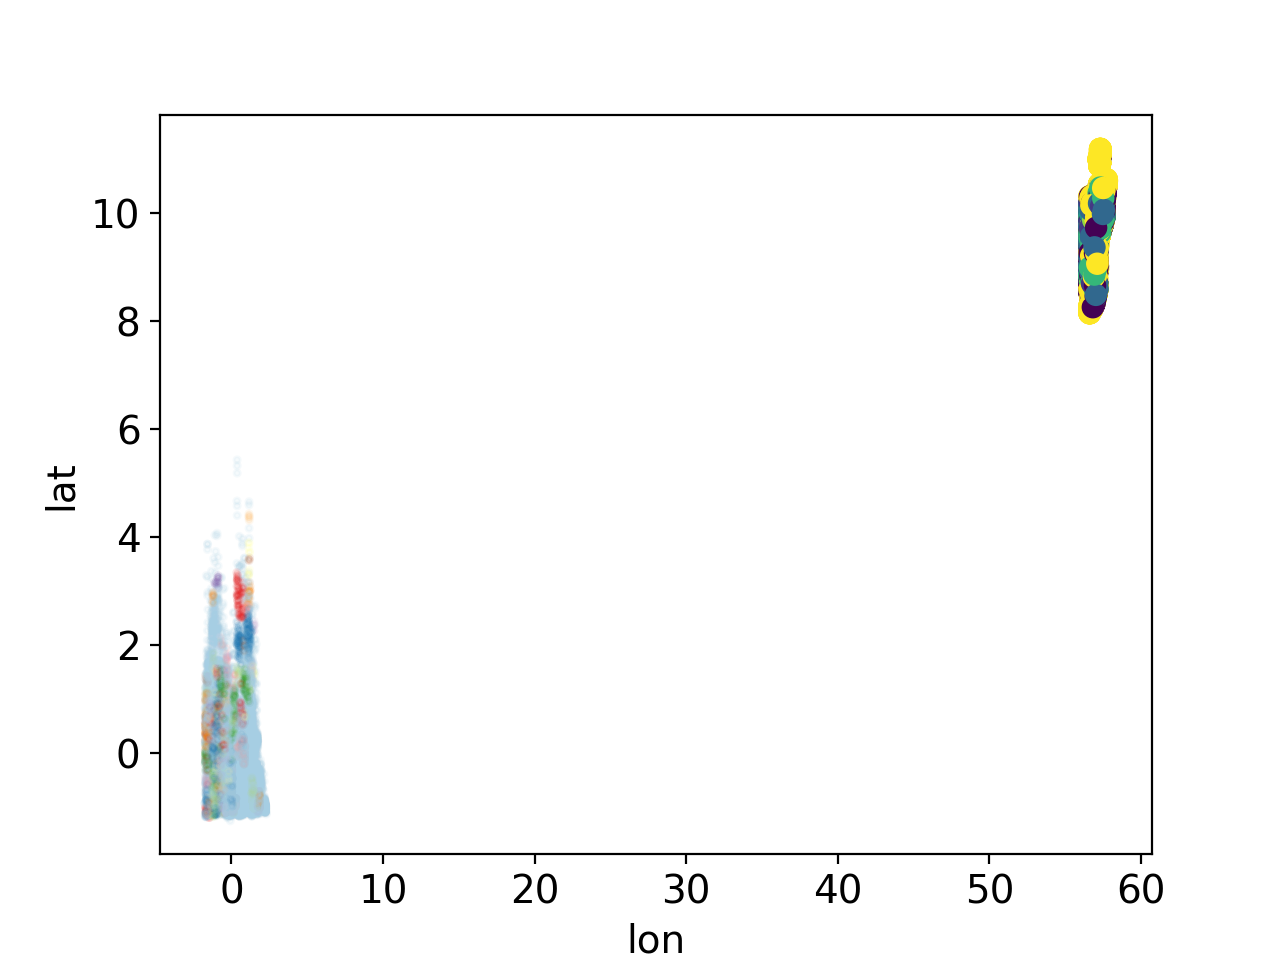

In [24]:
fig = plt.figure()
plt.scatter(XX.lon, XX.alt, alpha=.1, s=5, c=XX.cluster, cmap='Paired')

In [25]:
roads.sample(10000).plot(kind='scatter', x='lon', y='lat')

NameError: name 'roads' is not defined

In [27]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(X.lon, X.lat, c=X.cluster, s=50)

# cluster centers, marked by "+"
# plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('lon')
plt.ylabel('lat')

Text(72.06944444444443, 0.5, 'lat')

### Repeat with scaled data

In [28]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_scaled

array([[ 0.02182755, -0.34216931,  0.62633002, -0.50735777],
       [ 0.10615997, -1.51881511,  1.76334059, -0.93292209],
       [-0.37188668, -1.46212686,  0.22520782,  0.34377085],
       ...,
       [-1.05918466,  0.09836874, -0.82432088,  1.19489948],
       [ 0.51837823,  1.6060825 ,  0.46515608, -0.50735777],
       [ 1.16103409,  1.45213313, -1.11739303,  1.19489948]])

In [30]:
XX.head()

lat       lon       alt  cluster
9759    0.021826 -0.342152  0.626299       52
242155  0.106155 -1.518739  1.763252        0
323160 -0.371868 -1.462054  0.225197        1
94232   0.959071  1.306315  0.773461        2
33792   0.384956  0.831874  0.727615      142

In [31]:
km = KMeans(n_clusters=7, random_state=1)
any(km.fit_predict(X_scaled) != XX.cluster)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


True

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [32]:
# calculate SC for K=7
from sklearn import metrics
metrics.silhouette_score(XX[['lon', 'lat', 'alt']], X.cluster)

0.03901420418137836

In [33]:
metrics.silhouette_score(XX[['lon', 'lat', 'alt']], XX.cluster)

-0.3168527467040155

In [34]:
# calculate SC for K=2 through K=19
k_range = range(2, 40)
# scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(XX[['lon', 'lat', 'alt']])
    scores.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NameError: name 'scores' is not defined

<IPython.core.display.Javascript object>


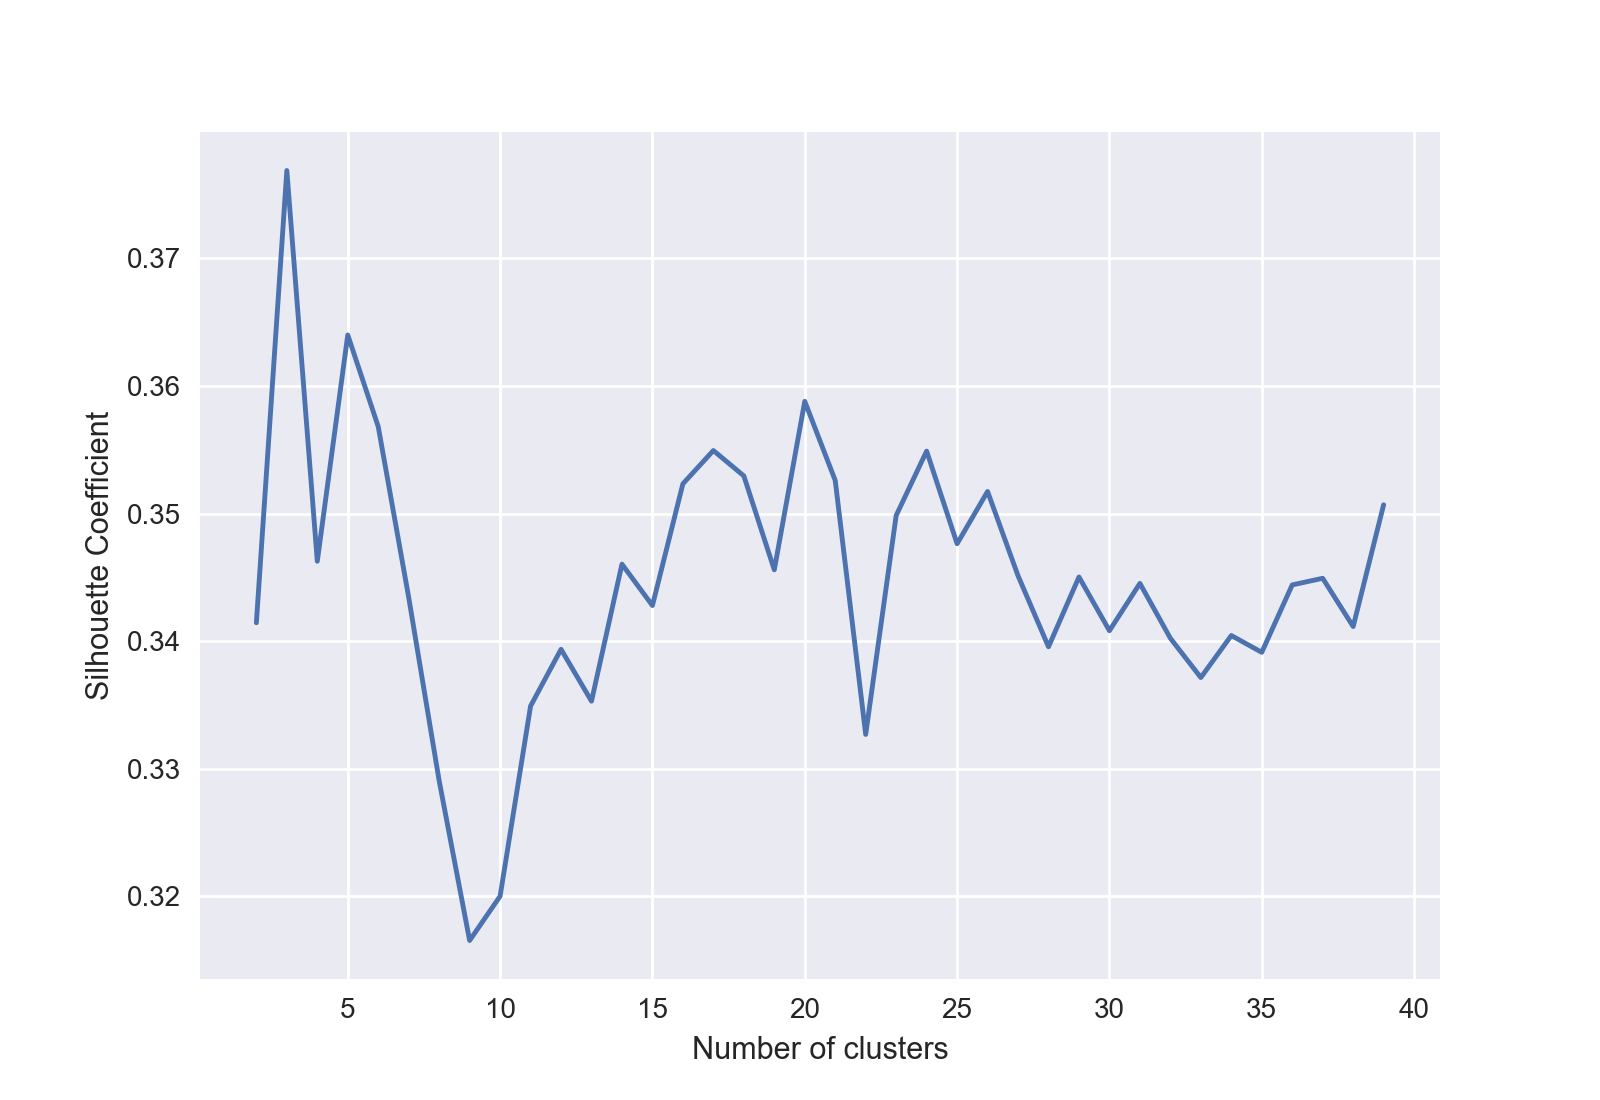

In [161]:
# plot the results
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## additional: Tweets with time and LonLat 

In [35]:
tweets = pd.read_csv('snow_tweets.csv', index_col=0)
tweets.time = pd.to_datetime(tweets.time, infer_datetime_format=True)

In [36]:
tweets.head()
tweets.dtypes

lat                 float64
lon                 float64
time    datetime64[ns, UTC]
dtype: object

In [37]:
trunc = tweets[(tweets.lon<-76) & (tweets.lon>-78) & (tweets.lat>38.4)&(tweets.lat<39.6)]

In [38]:
len(trunc)

161719

<IPython.core.display.Javascript object>


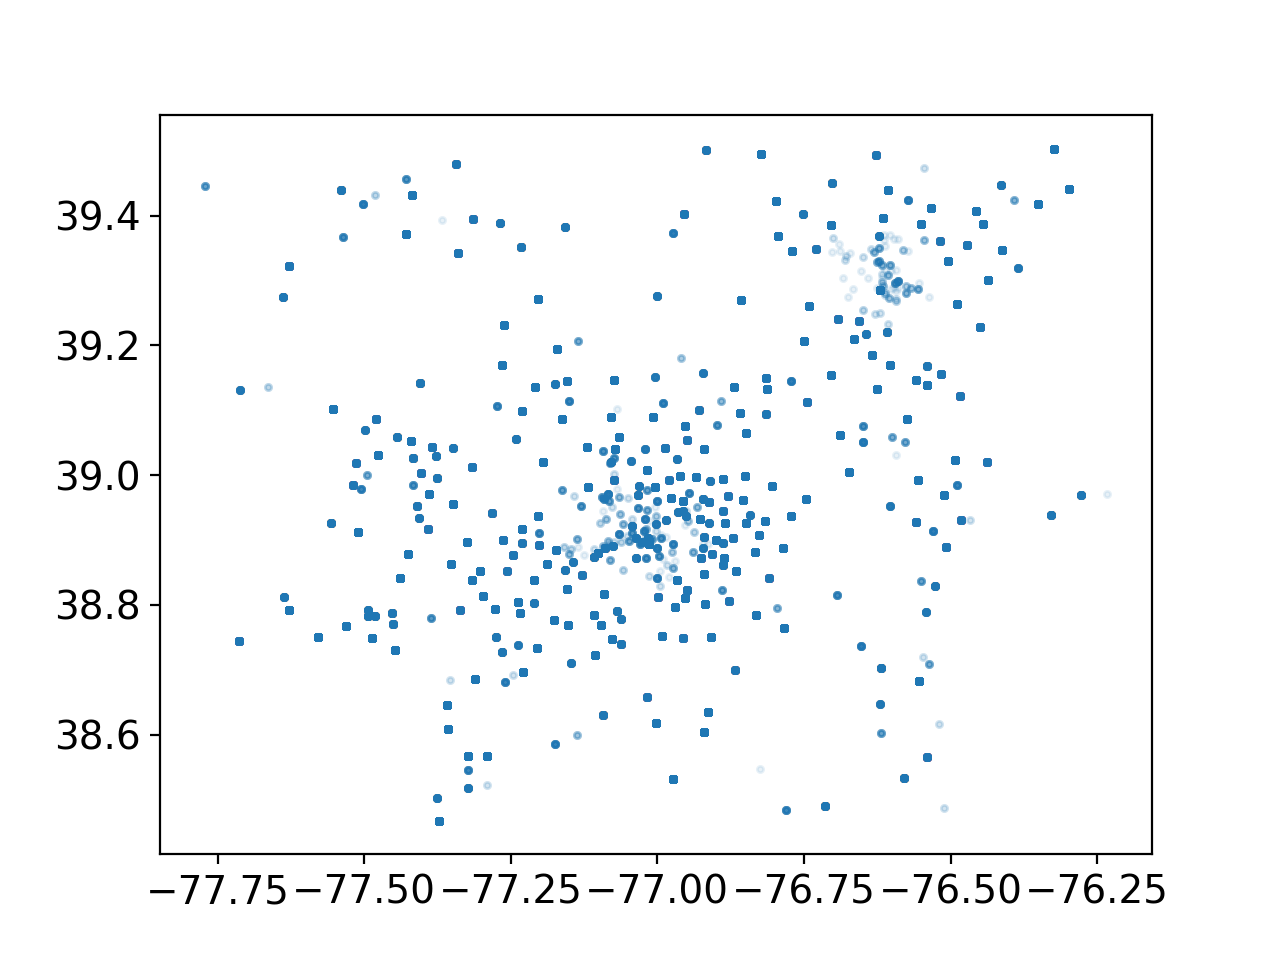

In [39]:
fig = plt.figure()
plt.scatter(trunc.lon, trunc.lat, alpha=.1, s=5,  cmap='Paired')

## Part 4: PCA 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)


In [41]:
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=100)

plt.cla()

pca = decomposition.PCA(n_components=3)
pca.fit_transform
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

/var/folders/9c/3ylcvqn54zs1r5tlfz4_znf00000gn/T/ipykernel_3618/194730680.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=100)
/var/folders/9c/3ylcvqn54zs1r5tlfz4_znf00000gn/T/ipykernel_3618/194730680.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.choose(y, [1, 2, 0]).astype(np.float)


In [42]:
pca.transform([[3,4,3,.2]])

array([[-2.11462576, -0.97175472,  1.615281  ]])

In [43]:
X

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [44]:

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()

/var/folders/9c/3ylcvqn54zs1r5tlfz4_znf00000gn/T/ipykernel_3618/3438464979.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)
/var/folders/9c/3ylcvqn54zs1r5tlfz4_znf00000gn/T/ipykernel_3618/3438464979.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.choose(y, [1, 2, 0]).astype(np.float)


In [45]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 3].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 3], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')

plt.show()

/var/folders/9c/3ylcvqn54zs1r5tlfz4_znf00000gn/T/ipykernel_3618/97499159.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)
/var/folders/9c/3ylcvqn54zs1r5tlfz4_znf00000gn/T/ipykernel_3618/97499159.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.choose(y, [1, 2, 0]).astype(np.float)
